In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Goals
1. How does a pokémon's generation affect its attack power?
2. How does a pokémon's legendarity affect its attack power?


## Describtion the Dataset

- *#*: ID for each pokemon
- *Name*: Name of each pokemon
- *Type 1*: Each pokemon has a type, this determines weakness/resistance to attacks
- *Type 2*: Some pokemon are dual type and have 2
- *Total*: sum of all stats that come after this, a general guide to how strong a pokemon is
- *HP*: hit points, or health, defines how much damage a pokemon can withstand before fainting
- *Attack*: the base modifier for normal attacks (eg. Scratch, Punch)
- *Defense*: the base damage resistance against normal attacks
- *SP Atk*: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- *SP Def*: the base damage resistance against special attacks
- *Speed*: determines which pokemon attacks first each round

In [2]:
sns.set_theme()
a = sns.color_palette("mako", as_cmap=True)

In [3]:
pokemons = pd.read_csv("Pokemon.csv")

In [4]:
pokemons.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [5]:
pokemons.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [39]:
poke_df = pd.get_dummies(pokemons.filter(like='Type').stack()).groupby(level=0).max()
poke_df = pd.concat([pokemons,poke_df], axis='columns')
for i in range(poke_df.shape[0]):
    if pd.isnull(poke_df.at[i,'Type 2']):
        poke_df.at[i,'2Types'] = 0
    else:
        poke_df.at[i,'2Types'] = 1
poke_df['2Types'] = poke_df['2Types'].astype(int)
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,2Types
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,True,False,False,False,True,False,False,False,False,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,True,False,False,False,True,False,False,False,False,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,True,False,False,False,True,False,False,False,False,1
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,...,True,False,False,False,True,False,False,False,False,1
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,1


In [7]:
pokemons.value_counts('Type 1')

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

<Axes: ylabel='count'>

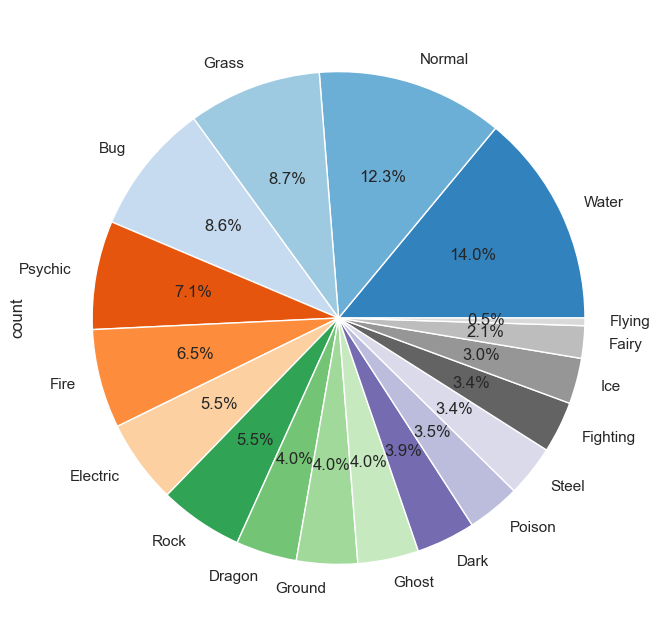

In [8]:
pokemons["Type 1"].value_counts().plot(kind="pie",autopct="%1.1f%%",cmap='tab20c',figsize=(8,8))

In [9]:
pokemons.groupby(['Type 1','Type 2']).count()

#  Name  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                             
Bug    Electric   2     2      2   2       2        2        2        2   
       Fighting   2     2      2   2       2        2        2        2   
       Fire       2     2      2   2       2        2        2        2   
       Flying    14    14     14  14      14       14       14       14   
       Ghost      1     1      1   1       1        1        1        1   
...              ..   ...    ...  ..     ...      ...      ...      ...   
Water  Ice        3     3      3   3       3        3        3        3   
       Poison     3     3      3   3       3        3        3        3   
       Psychic    5     5      5   5       5        5        5        5   
       Rock       4     4      4   4       4        4        4        4   
       Steel      1     1      1   1       1        1        1        1   

                 Speed  Generation  Legendary  
Type 1 Type 2                                  
Bug    Electric      2           2          2  
       Fighting      2           2          2  
       Fire          2           2          2  
       Flying       14          14         14  
       Ghost         1           1          1  
...                ...         ...        ...  
Water  Ice           3           3          3  
       Poison        3           3          3  
       Psychic       5           5          5  
       Rock          4           4          4  
       Steel         1           1          1  

[136 rows x 11 columns]

<Axes: ylabel='count'>

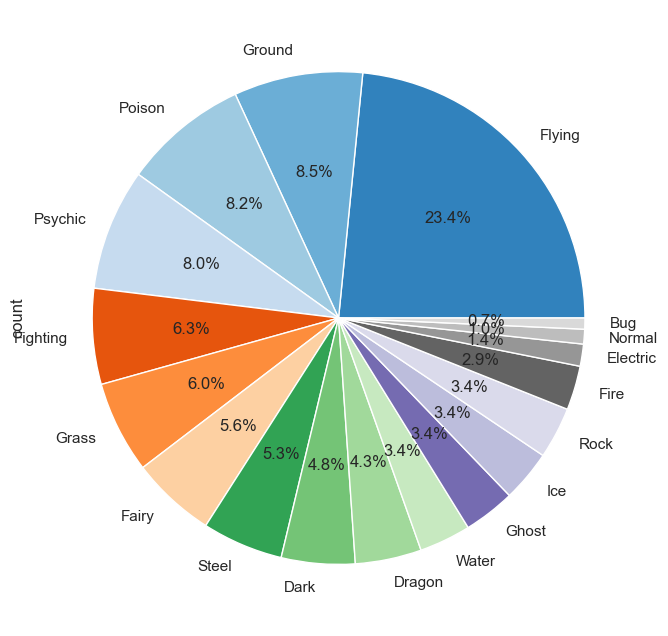

In [10]:
pokemons["Type 2"].value_counts().plot(kind="pie",autopct="%1.1f%%", cmap='tab20c',figsize=(8,8))

In [11]:
pokemons.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Since there are a lot of unnecessary empty fields, I'll clean up the dataset.

In [12]:
pokemons['Type 2'].fillna(pokemons['Type 1'], inplace=True)

In [13]:
pokemons['Legendary'] = pokemons.Legendary.astype(int)
pokemons.Legendary.dtype

dtype('int64')

In [14]:
pokemons['Name'] = pokemons['Name'].str.replace('.*Mega', 'Mega', regex=True)

In [15]:
pokemons.info

<bound method DataFrame.info of        #                 Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1            Bulbasaur    Grass  Poison    318  45      49       49   
1      2              Ivysaur    Grass  Poison    405  60      62       63   
2      3             Venusaur    Grass  Poison    525  80      82       83   
3      3        Mega Venusaur    Grass  Poison    625  80     100      123   
4      4           Charmander     Fire    Fire    309  39      52       43   
..   ...                  ...      ...     ...    ...  ..     ...      ...   
795  719              Diancie     Rock   Fairy    600  50     100      150   
796  719         Mega Diancie     Rock   Fairy    700  50     160      110   
797  720  HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720   HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721            Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  G

Since the attack consists of several fields, I create a separate column for the general description.

In [16]:
pokemons['Sum_of_Atk']=pokemons['Sp. Atk']+pokemons['Attack']
pokemons.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Sum_of_Atk
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,114
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,142
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,182
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,222
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,0,112
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,0,144
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,0,193
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,0,260
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,0,263
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,0,98


In [17]:
pokemons.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Sum_of_Atk
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125,151.821250
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339,54.462505
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000,20.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000,111.750000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000,146.500000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000,182.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000,360.000000


In [18]:
print(pokemons.groupby("Generation")["Total"].max())

Generation
1    780
2    700
3    780
4    720
5    700
6    700
Name: Total, dtype: int64


We need to know how many generations are there

In [19]:
pokemons.Generation.unique()

array([1, 2, 3, 4, 5, 6])

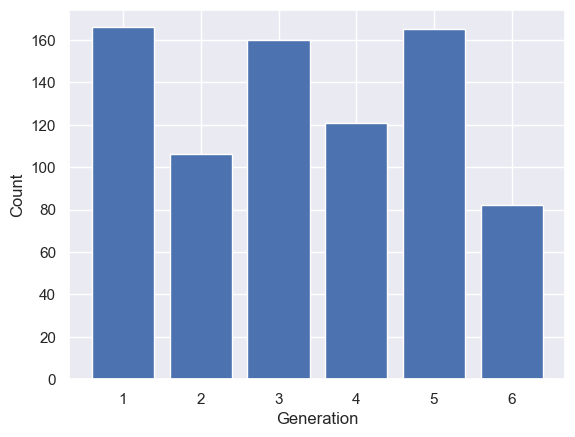

In [20]:
count = pokemons['Generation'].value_counts()
count = count.sort_index()
plt.bar(count.index, count.values)
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()

## _general description of the fields of interest_

In [21]:
pokemons[["Name","Sum_of_Atk", "Legendary", 'Generation']].sort_values(by= "Sum_of_Atk",ascending= False).head(10)

,Name,Sum_of_Atk,Legendary,Generation
429,DeoxysAttack Forme,360,1,3
426,Mega Rayquaza,360,1,3
163,Mega Mewtwo X,344,1,1
164,Mega Mewtwo Y,344,1,1
422,KyogrePrimal Kyogre,330,1,3
424,GroudonPrimal Groudon,330,1,3
798,HoopaHoopa Unbound,330,1,6
796,Mega Diancie,320,1,6
428,DeoxysNormal Forme,300,1,3
750,AegislashBlade Forme,300,0,6


In [22]:
print('columns of the dataset are: ', pokemons.columns) 
print('shape of the dataframe is: ', pokemons.shape)  

columns of the dataset are:  Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Sum_of_Atk'],
      dtype='object')
shape of the dataframe is:  (800, 14)


In [23]:
print('Mean:', pokemons['Attack'].mean())
print('Median:', pokemons['Attack'].median())
print('Standard deviation:', pokemons['Attack'].std())
print('Minimum:', pokemons['Attack'].min())
print('Maximum:', pokemons['Attack'].max())

Mean: 79.00125
Median: 75.0
Standard deviation: 32.45736586949845
Minimum: 5
Maximum: 190


In [24]:
(pokemons["Attack"]>75).sum()

391

In [25]:
print('Mean:', pokemons['Generation'].mean())
print('Median:', pokemons['Generation'].median())
print('Standard deviation:', pokemons['Generation'].std())
print('Minimum:', pokemons['Generation'].min())
print('Maximum:', pokemons['Generation'].max())

Mean: 3.32375
Median: 3.0
Standard deviation: 1.6612904004849451
Minimum: 1
Maximum: 6


In [26]:
print('Mean:', pokemons['Sp. Atk'].mean())
print('Median:', pokemons['Sp. Atk'].median())
print('Standard deviation:', pokemons['Sp. Atk'].std())
print('Minimum:', pokemons['Sp. Atk'].min())
print('Maximum:', pokemons['Sp. Atk'].max())

Mean: 72.82
Median: 65.0
Standard deviation: 32.7222941688016
Minimum: 10
Maximum: 194


In [27]:
print(pokemons['Legendary'].sum())

65


([<matplotlib.patches.Wedge at 0x12f318bd0>,
 [Text(-1.0643589911946993, 0.2777407745776662, 'Non-Legendary'),
  Text(1.1611188853011427, -0.30298999025880746, 'Legendary')],
 [Text(-0.5805594497425632, 0.15149496795145428, '91.9%'),
  Text(0.6773193497589998, -0.17674416098430432, '8.1%')])

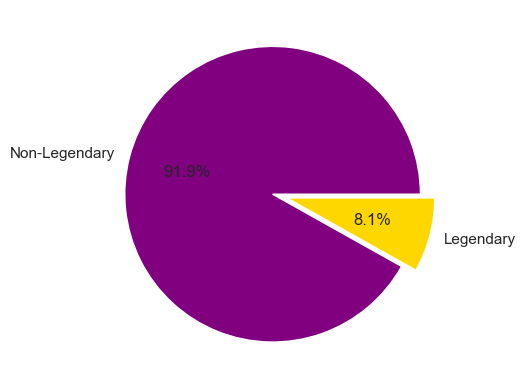

In [28]:
x = pokemons.Legendary.value_counts()
labels=["Non-Legendary","Legendary"]
colors = ['purple','gold']
explode = (0, 0.1)
plt.pie(x, explode=explode, labels= labels, colors=colors, autopct= "%1.1f%%")

PLANS

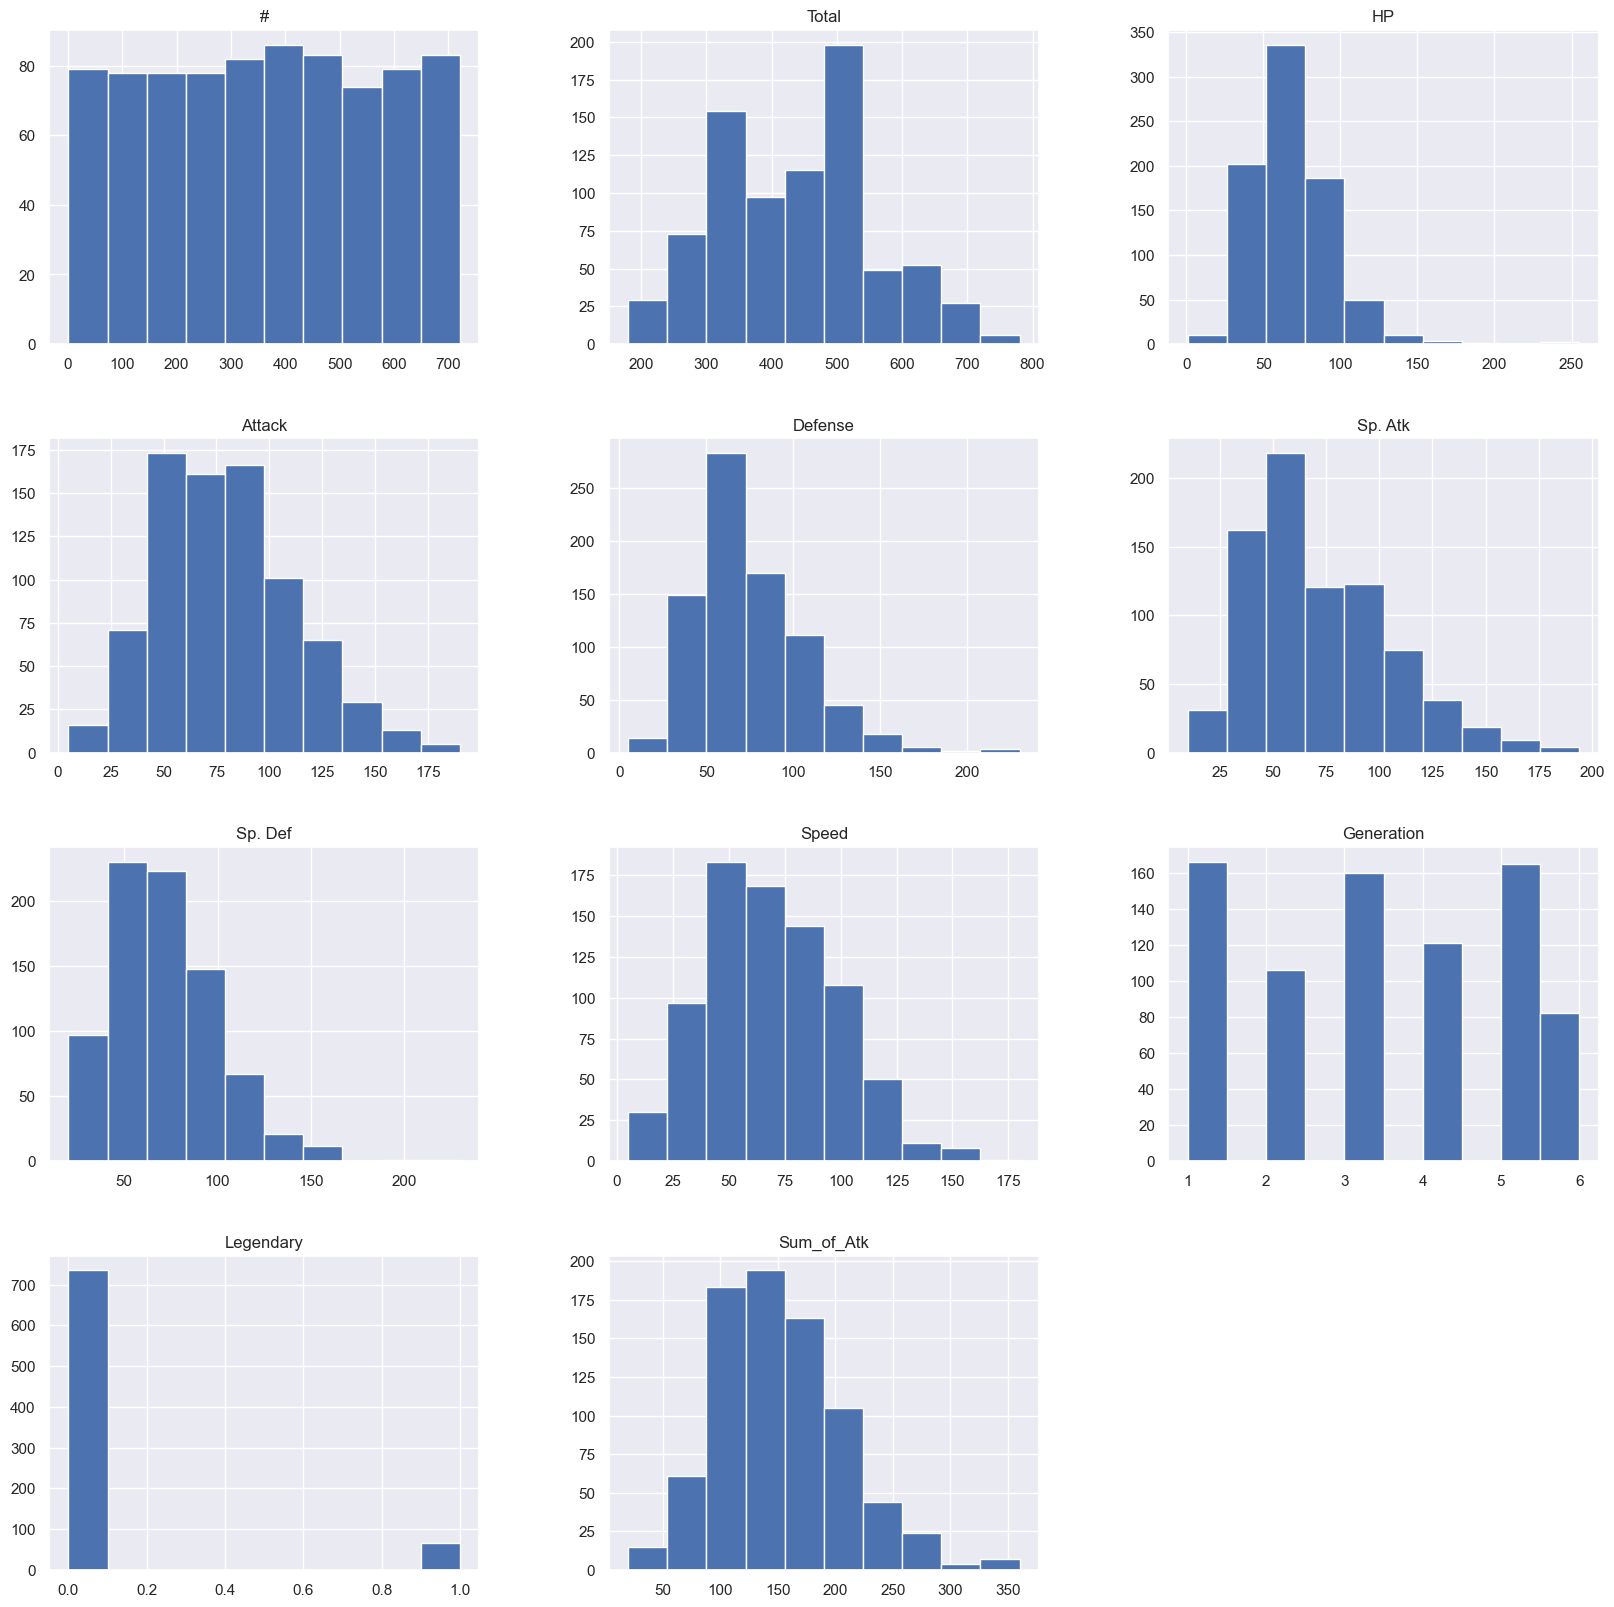

In [29]:
p = pokemons.hist(figsize = (20,20))

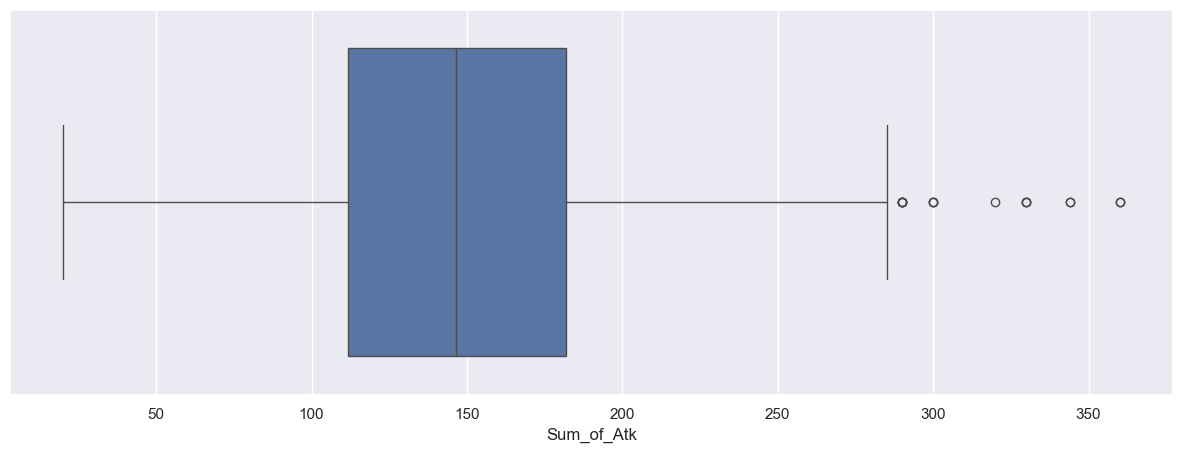

In [30]:
plt.figure(figsize=(15, 5))
sns.boxplot(pokemons, x="Sum_of_Atk")
plt.show()

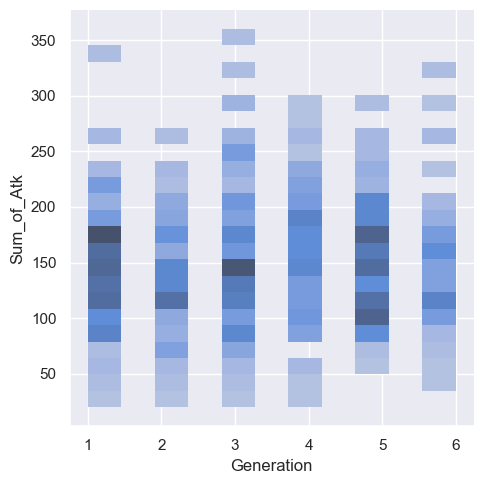

In [31]:
sns.displot(data=pokemons, y="Sum_of_Atk", x='Generation')

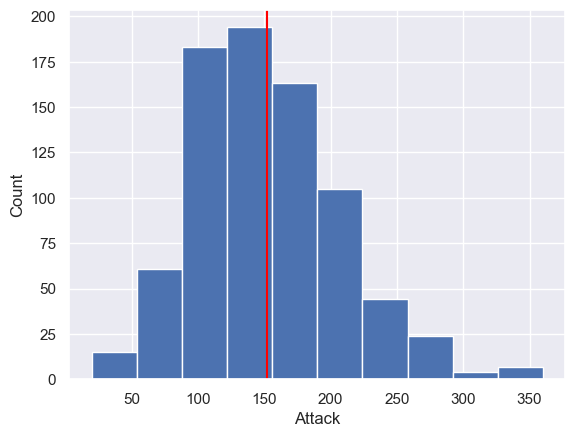

In [32]:
plt.hist(pokemons["Sum_of_Atk"])
plt.xlabel('Attack')
plt.ylabel('Count')
plt.plot()
plt.axvline(pokemons['Sum_of_Atk'].mean(), color='red')
plt.show()

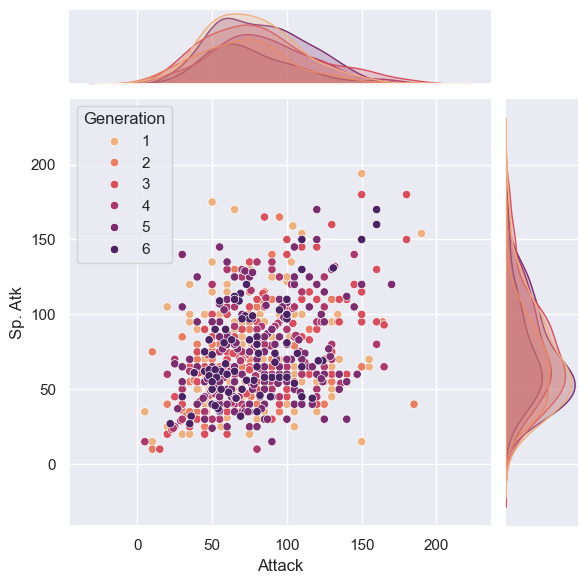

In [33]:
sns.jointplot(data=pokemons, x="Attack", y="Sp. Atk", hue="Generation",palette='flare')

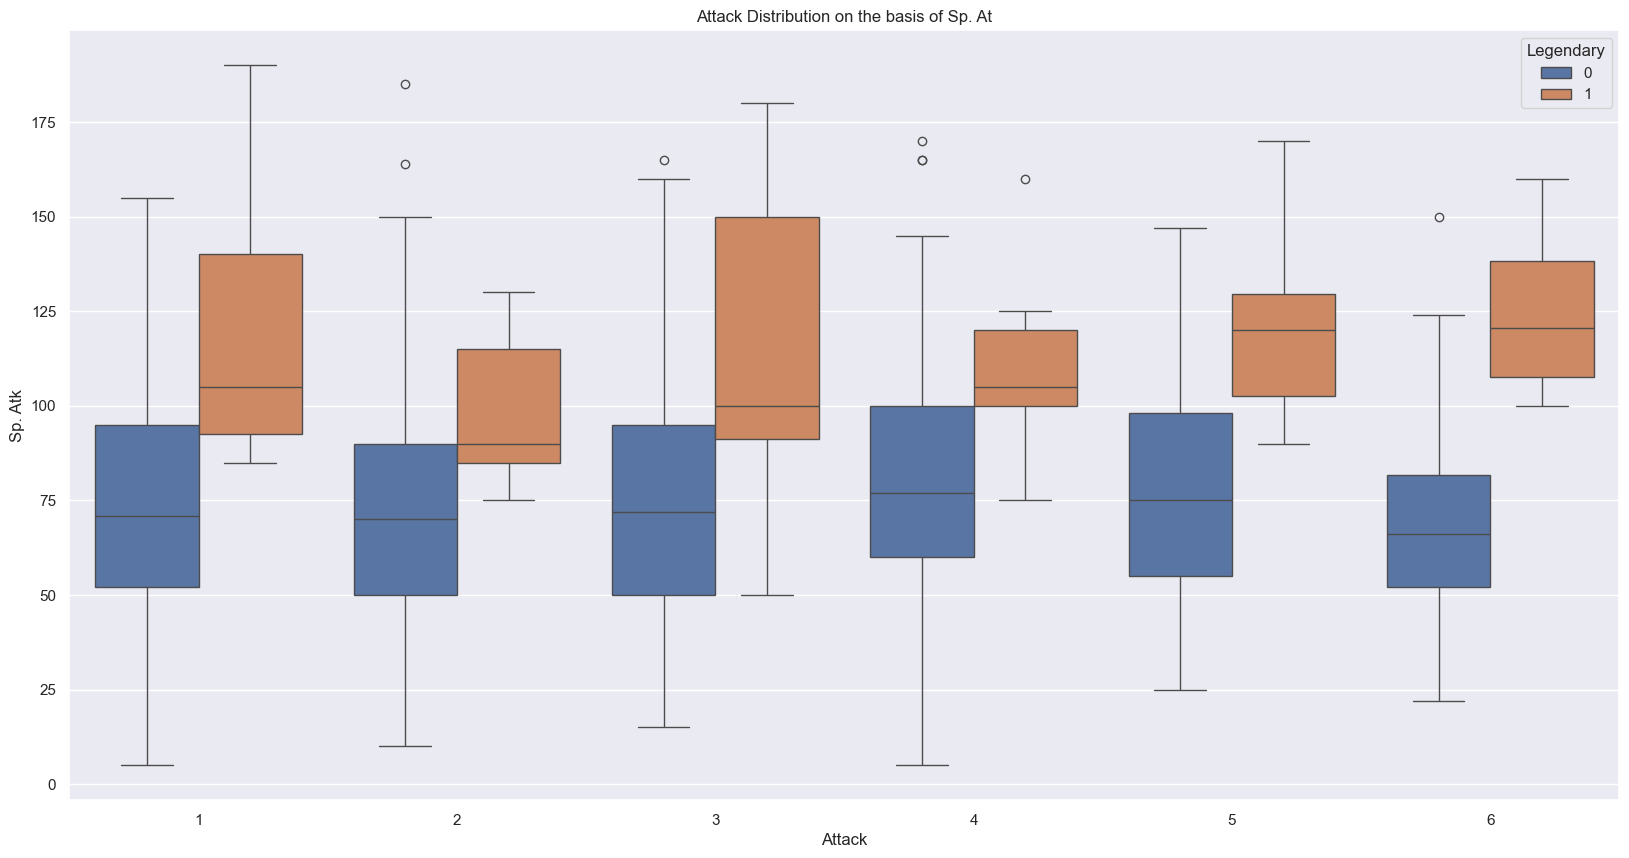

In [34]:
plt.figure(figsize=(20, 10))
sns.boxplot(pokemons, y="Attack", x="Generation", hue='Legendary')
plt.xlabel("Attack")
plt.ylabel("Sp. Atk")
plt.title("Attack Distribution on the basis of Sp. At")
plt.show()

<Axes: xlabel='Legendary', ylabel='Total'>

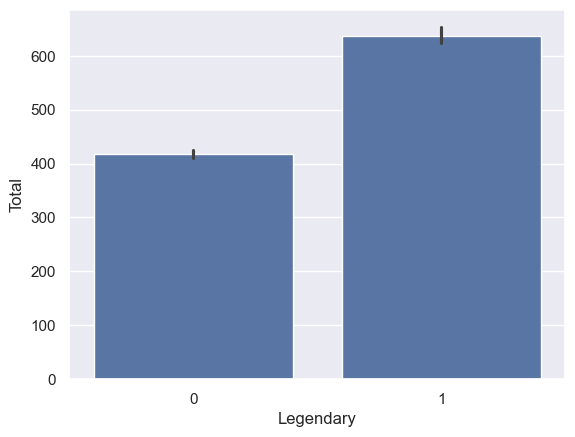

In [35]:
sns.barplot(x="Legendary", y="Total", data=pokemons)

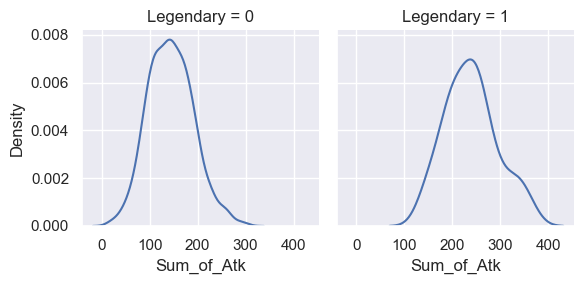

In [36]:
df = pokemons[pokemons['Legendary'].isin([False, True])]
g = sns.FacetGrid(df, col="Legendary")
g.map(sns.kdeplot, "Sum_of_Atk")

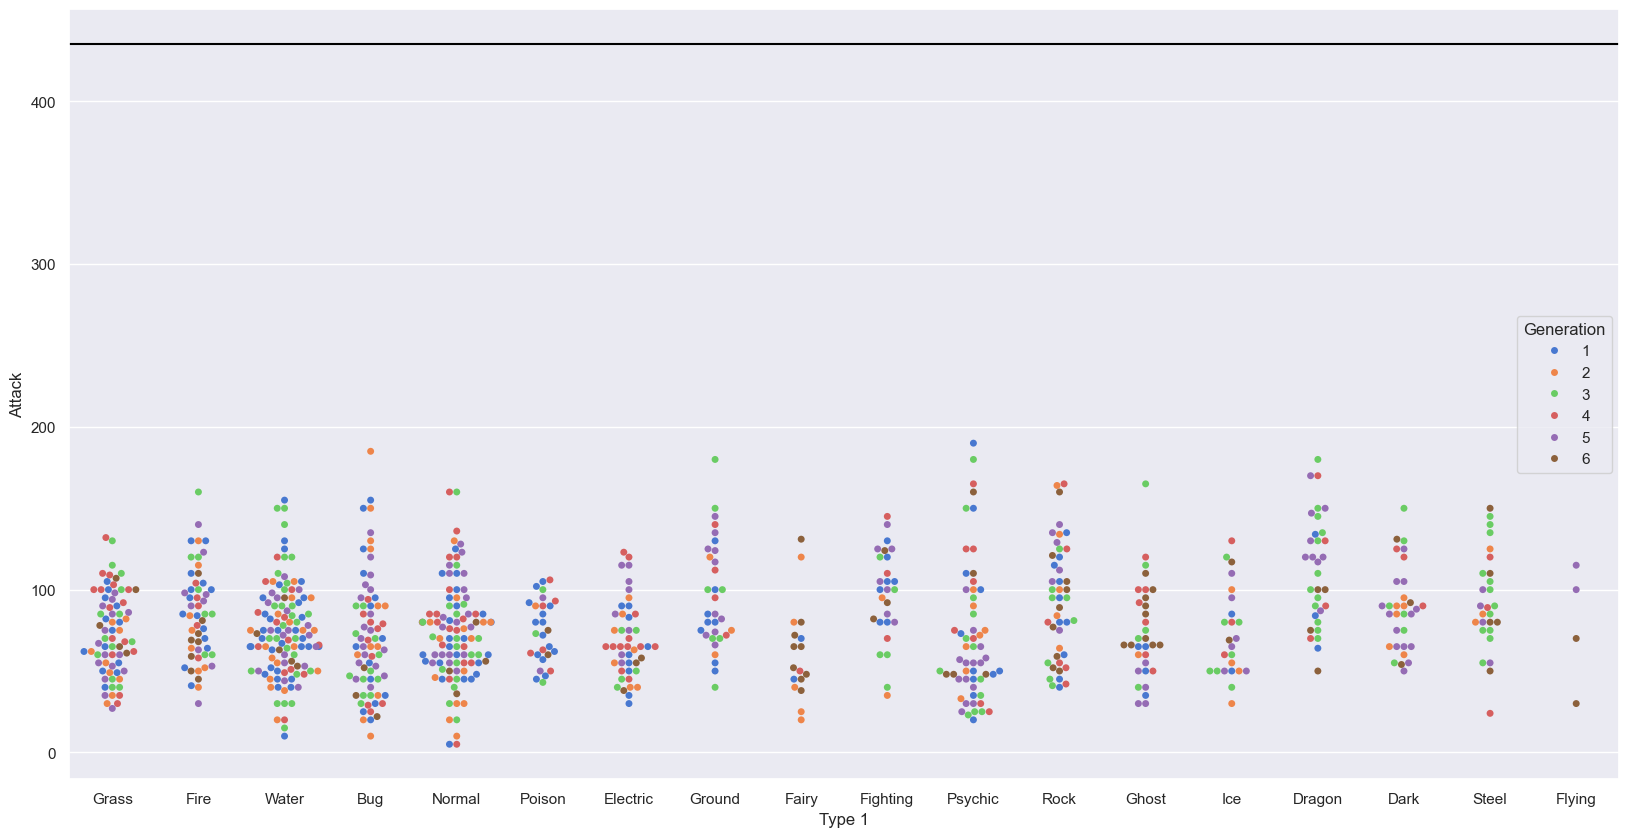

In [37]:
plt.figure(figsize=(20, 10))
df1 = pokemons[pokemons['Type 1'].isin(pokemons['Type 1'].value_counts().index)]
sns.swarmplot(x='Type 1', y='Attack', data=df1, hue='Generation', palette='muted')
plt.axhline(df1['Total'].mean(), color='black')
plt.show()

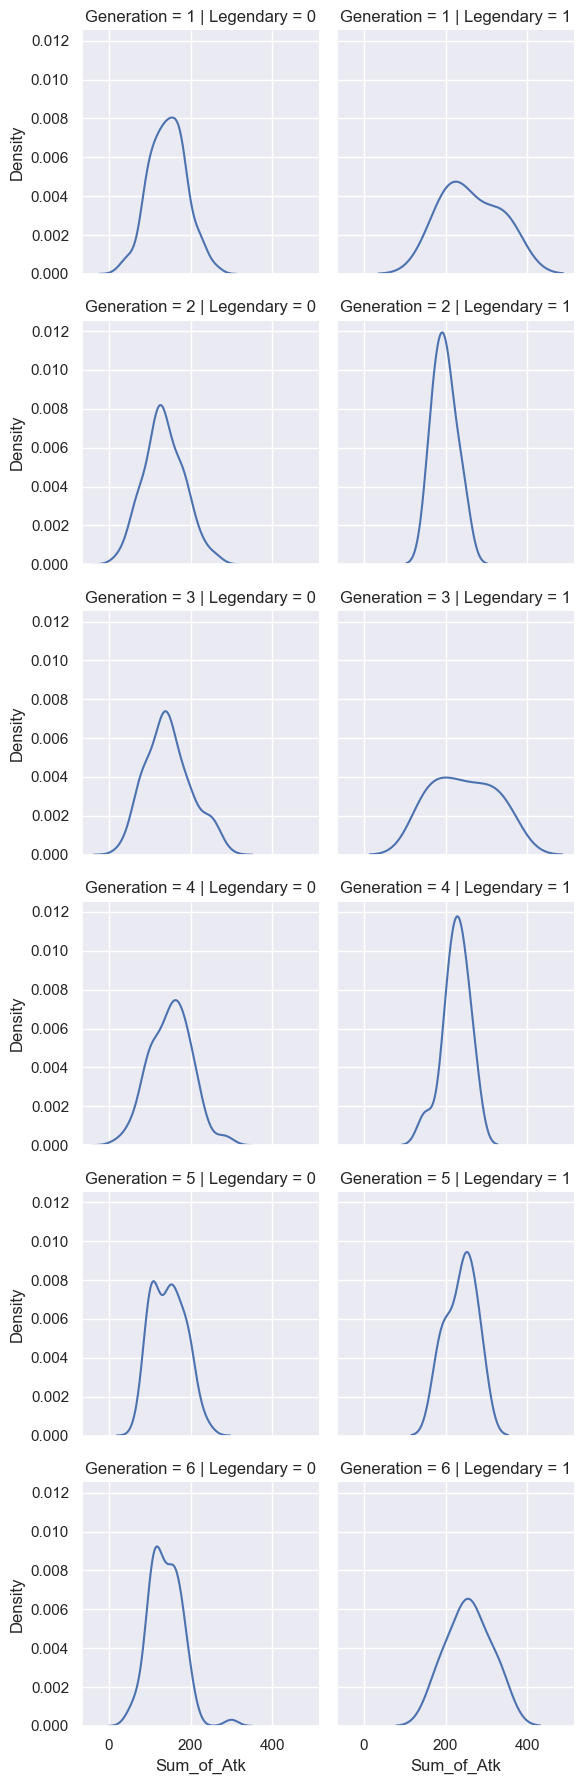

In [38]:
g = sns.FacetGrid(pokemons, row='Generation', col='Legendary')
g.map(sns.kdeplot, 'Sum_of_Atk')